In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sympy import *
from statsmodels.tsa.seasonal import seasonal_decompose

#Dữ liệu và kiểm tra

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data for Colab/Data.xlsx/sensor ITIM.csv', index_col = 0)
df.index.name = 'index'
ori_df = df
ori_df.dtypes

feature 1       float64
feature 2       float64
feature 3       float64
feature 4       float64
feature 5       float64
feature 6       float64
feature 7       float64
feature 8       float64
feature 9       float64
feature 10      float64
feature time      int64
Gas A           float64
Gas B           float64
class             int64
dtype: object

In [ ]:
df.head()

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,feature time,Gas A,Gas B,class
index,,,,,,,,,,,,,,
1,0.989,0.997,1.007,1.013,1.031,0.977,1.007,1.041,0.968,0.961,1,75.0,0.0,1
2,0.990,0.995,1.010,1.019,1.045,0.970,1.032,1.082,0.989,0.954,2,75.0,0.0,1
3,0.989,0.994,1.013,1.026,1.065,0.966,1.067,1.137,1.037,0.967,3,75.0,0.0,1
4,0.988,0.992,1.018,1.036,1.090,0.966,1.116,1.205,1.105,1.007,4,75.0,0.0,1
5,0.986,0.991,1.024,1.047,1.117,0.973,1.168,1.298,1.200,1.059,5,75.0,0.0,1


#Tiền xử lý

In [ ]:
df_null = df.isnull()
null_counts = df_null.sum()
print(null_counts)

feature 1       0
feature 2       0
feature 3       0
feature 4       0
feature 5       0
feature 6       0
feature 7       0
feature 8       0
feature 9       0
feature 10      0
feature time    0
Gas A           0
Gas B           0
class           0
dtype: int64


#Phân tích

In [ ]:
ori_df[(ori_df['class'] == 1)].describe()

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,feature time,Gas A,Gas B,class
count,1501.000000,1501.000000,1501.000000,1501.00000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.0,1501.0,1501.0
mean,1.118484,1.174941,1.211003,1.09962,1.216811,2.125871,2.994690,3.343125,3.377073,3.226221,751.000000,75.0,0.0,1.0
std,0.068933,0.120195,0.221304,0.12478,0.287712,0.620142,1.530898,2.689552,2.550196,2.205667,433.445691,0.0,0.0,0.0
min,0.983000,0.991000,1.007000,1.00300,1.000000,0.966000,1.007000,1.041000,0.968000,0.954000,1.000000,75.0,0.0,1.0
25%,1.062000,1.068000,1.029000,1.00500,1.010000,1.604000,1.782000,1.410000,1.474000,1.566000,376.000000,75.0,0.0,1.0
50%,1.100000,1.136000,1.091000,1.02000,1.035000,1.913000,2.200000,1.749000,1.900000,1.980000,751.000000,75.0,0.0,1.0
75%,1.171000,1.276000,1.410000,1.24500,1.546000,2.613000,4.267000,5.697000,5.416000,4.822000,1126.000000,75.0,0.0,1.0
max,1.259000,1.410000,1.622000,1.31100,1.720000,3.401000,5.986000,8.585000,8.489000,7.783000,1501.000000,75.0,0.0,1.0


<Axes: xlabel='index', ylabel='percent_B'>

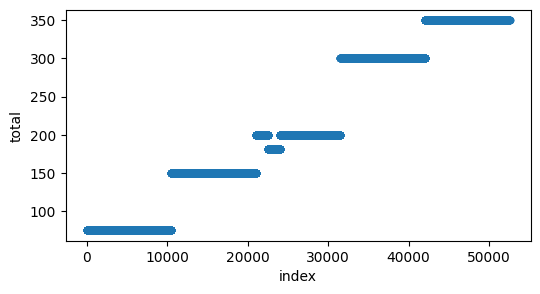

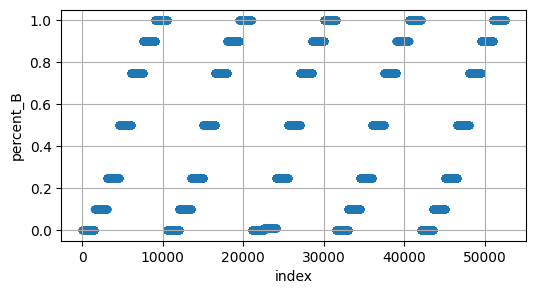

In [ ]:
df['total'] = (df['Gas A'] + df['Gas B'])
df['percent_B'] = df['Gas B']/(df['Gas A'] + df['Gas B'])
df.reset_index().plot(kind='scatter', x='index', y='total', figsize = (6,3))
df.reset_index().plot(kind='scatter', x='index', y='percent_B', figsize = (6,3), grid = True)

In [ ]:
# df['Gas B'].loc[df['class'] == 16] = 20

In [ ]:
class1_7 = df[(df['class'] >=1) & (df['class'] <=7)]

<Axes: xlabel='index', ylabel='feature 1'>

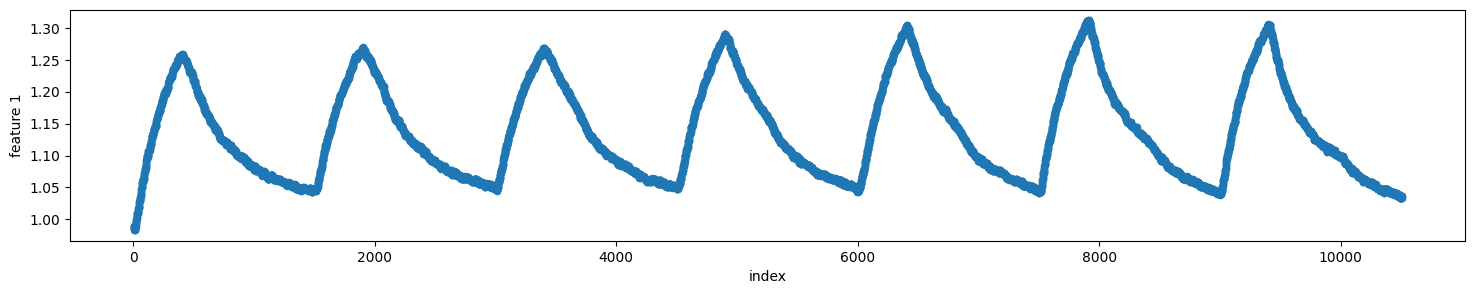

In [ ]:
fig = (18,3)
class1_7.reset_index().plot(kind='scatter', x='index', y='feature 1', figsize = fig)

[]

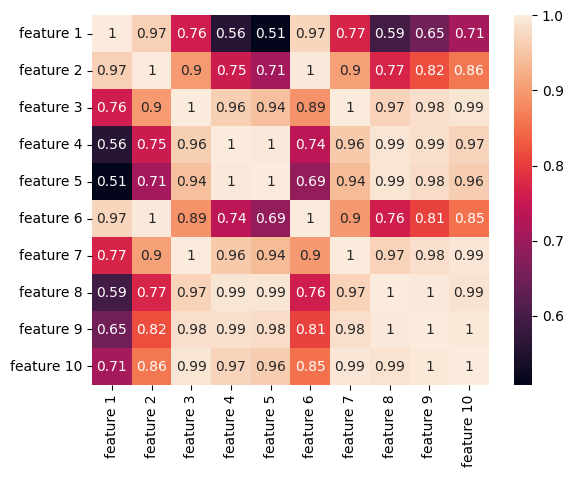

In [ ]:
test_K = df[(df['class'] == 1)]
sns.heatmap(test_K[['feature 1','feature 2', 'feature 3','feature 4','feature 5','feature 6','feature 7','feature 8','feature 9','feature 10']].corr(),annot = True).plot()

[]

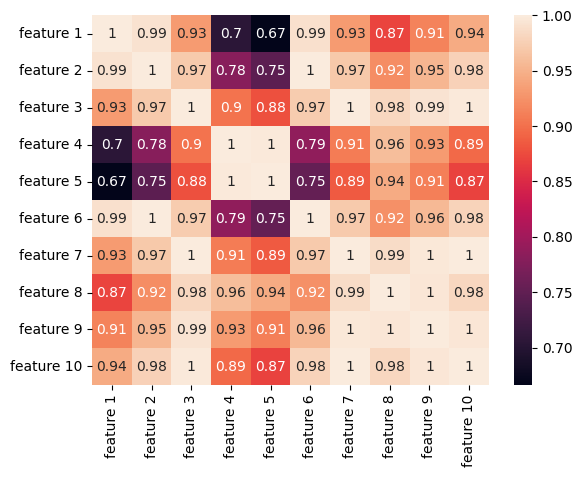

In [ ]:
test_F = df.loc[(df['feature time'] < 400) & (df['class'] == 1)]
sns.heatmap(test_F[['feature 1','feature 2', 'feature 3','feature 4','feature 5','feature 6','feature 7','feature 8','feature 9','feature 10']].corr(),annot = True).plot()

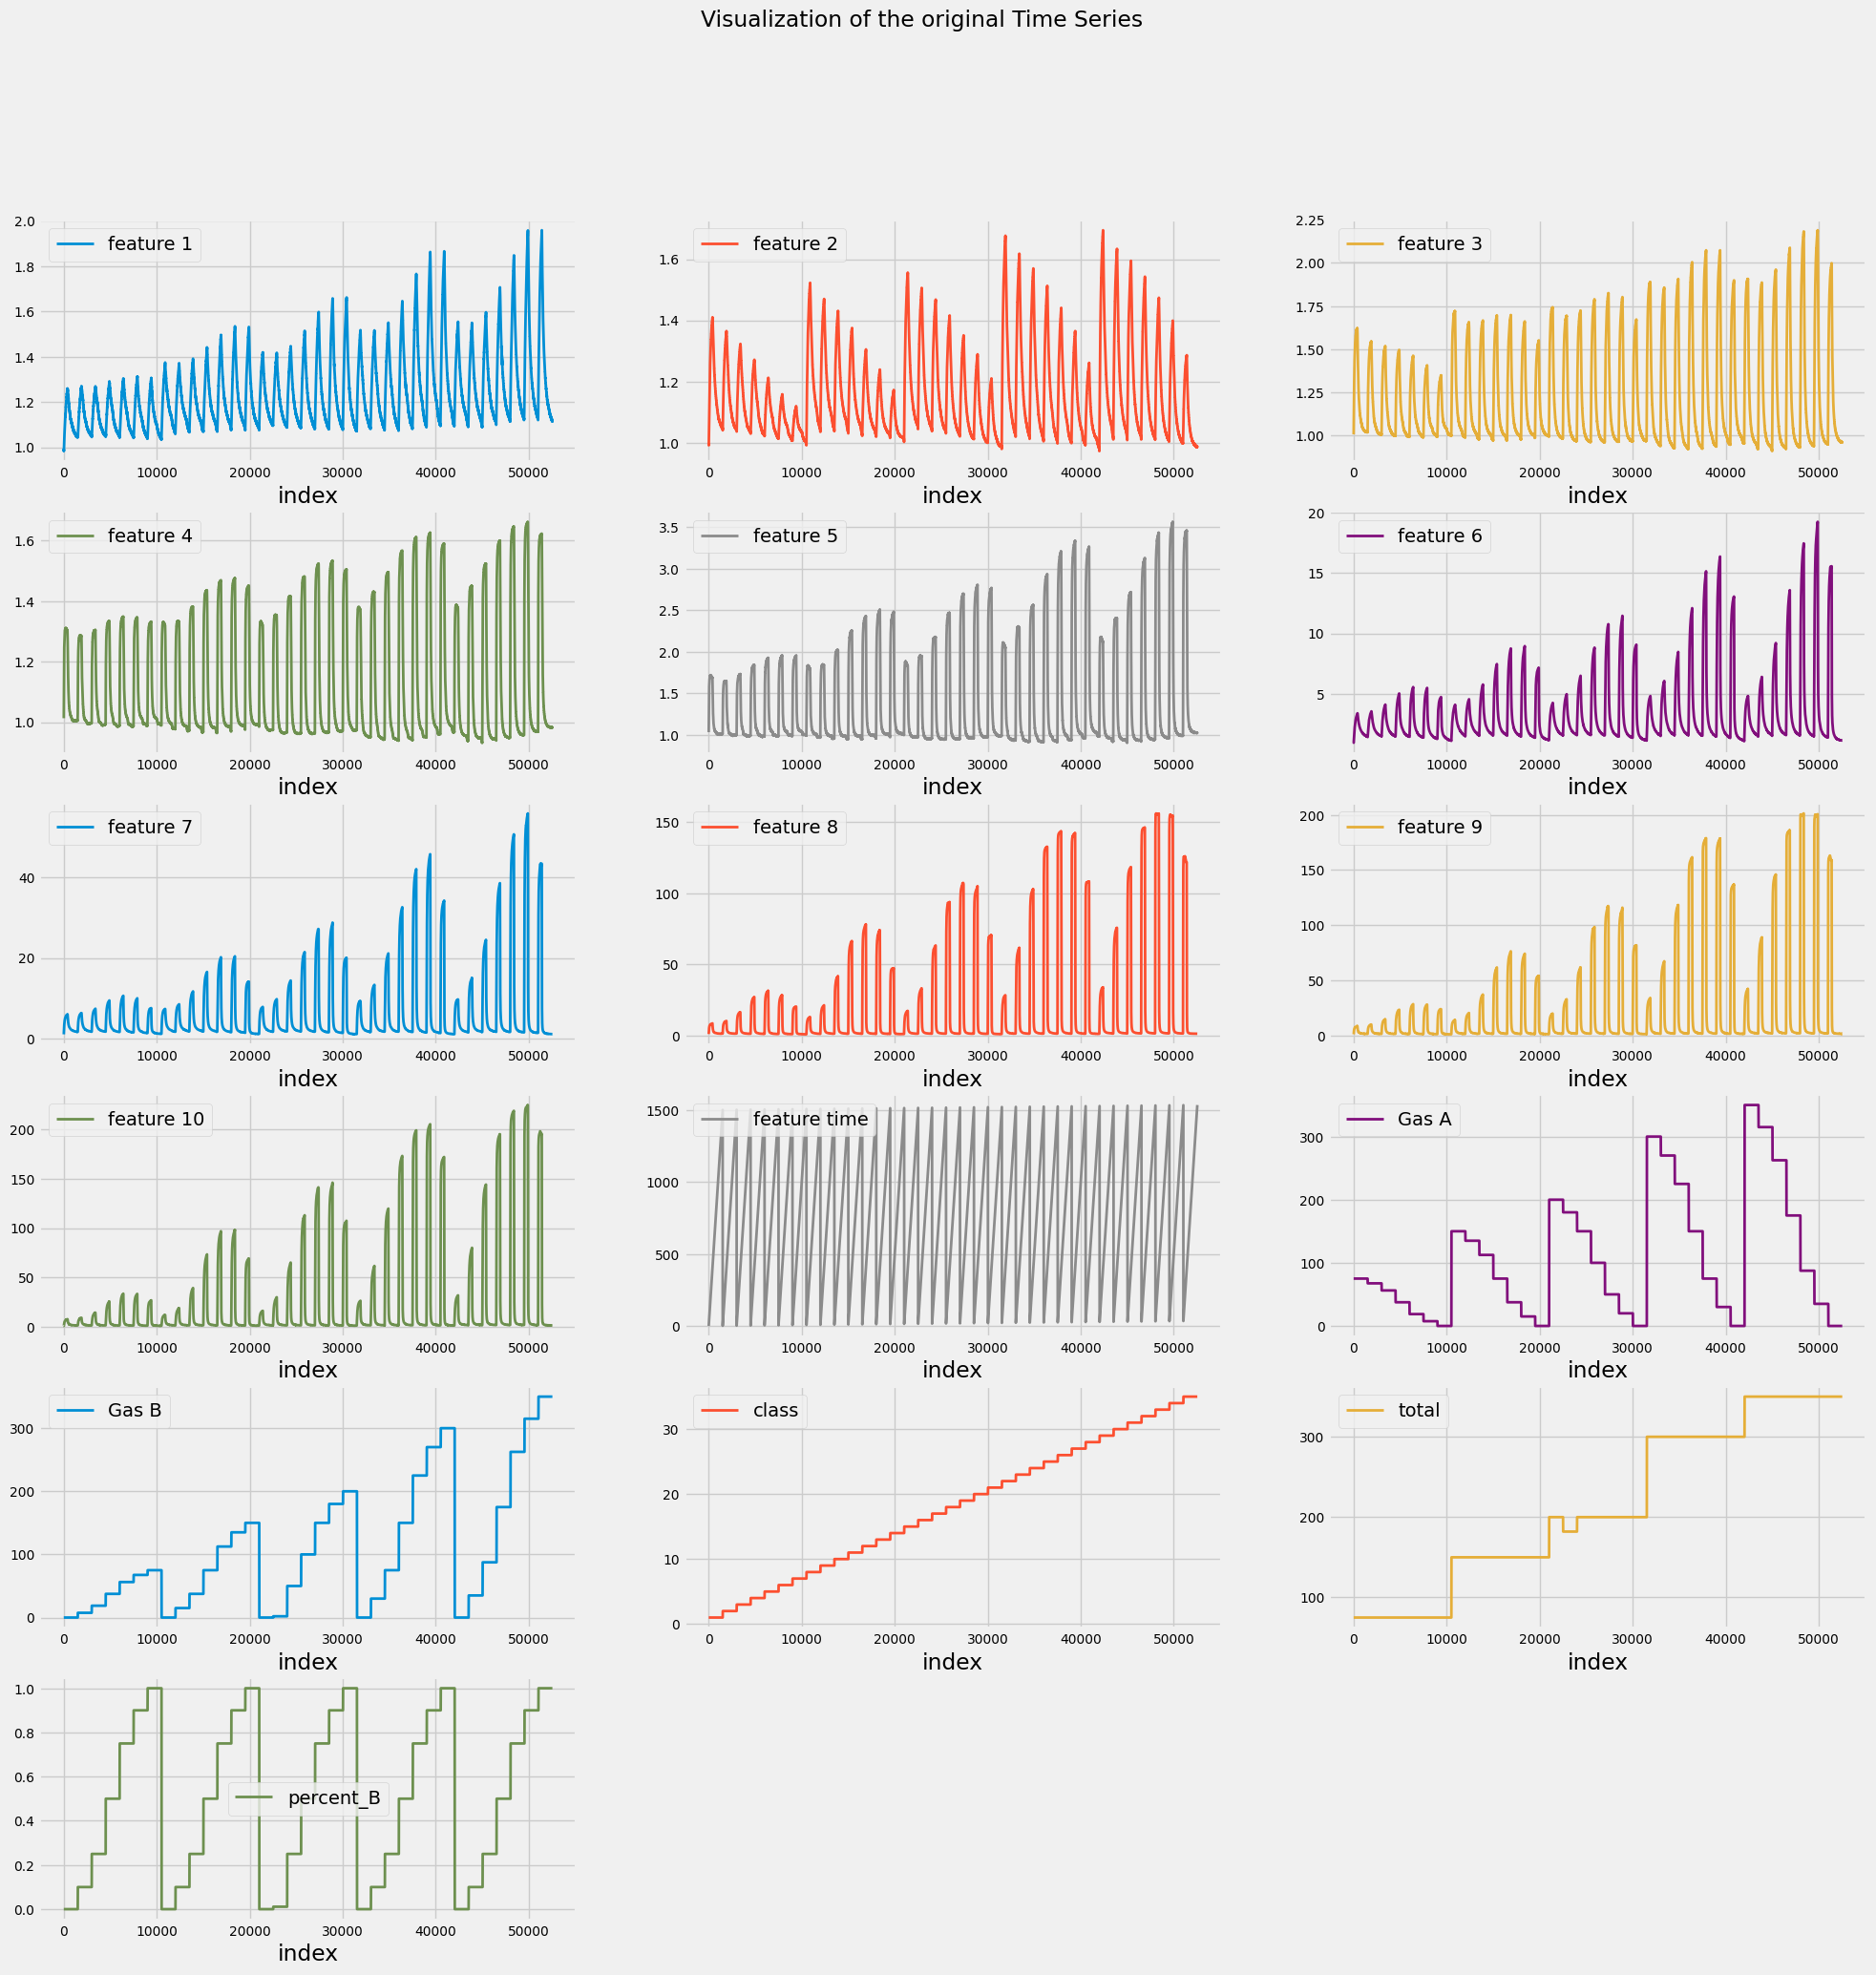

In [ ]:
# test_K = df.drop(columns=['Gas A','Gas B'])
test_K = df

plt.style.use('fivethirtyeight')
test_K.plot(subplots=True,
        layout=(6, 3),
        figsize=(22,22),
        fontsize=10,
        linewidth=2,
        sharex=False,
        title='Visualization of the original Time Series')
plt.show()

#Hướng đi tiếp theo
Đầu vào là 10 feature
- Học có giám sát:
  - bài toán hồi quy: đầu ra là con số cụ thể nồng độ khí ga
  - bài toán phân loại: đầu ra là 1 trong 35 nhóm có sẵn
- Học không giám sát:
  - bài toán phân cụm: đầu ra là nhóm do máy phân loại